In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C://Users/HP/Downloads/train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Starting with EDA by checking is there a null values or not.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Replacing values with null values by taking median of Self_ Employeed and Credit_History

In [8]:
sem = df["Self_Employed"].median
df["Self_Employed"].fillna(sem)
df["Credit_History"].fillna(1.0)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Changing the Datatype of Dependants by astype

In [11]:
df["Dependents"].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [12]:
df.replace(to_replace="3+",value=4,inplace = True)

In [13]:
df["Dependents"].unique()

array(['1', '0', '2', 4], dtype=object)

In [14]:
df["Dependents"] = df["Dependents"].astype("float64")

In [15]:
df["Dependents"].unique()

array([1., 0., 2., 4.])

# Checking Outliers and Co - orelation in the dataset

<AxesSubplot:xlabel='Education', ylabel='count'>

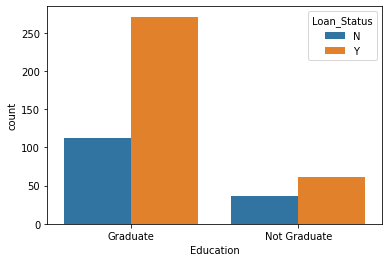

In [16]:
sns.countplot(df["Education"],hue = df["Loan_Status"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

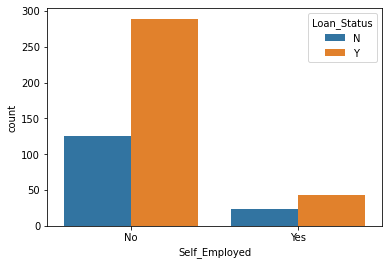

In [17]:
sns.countplot(df["Self_Employed"],hue = df["Loan_Status"])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

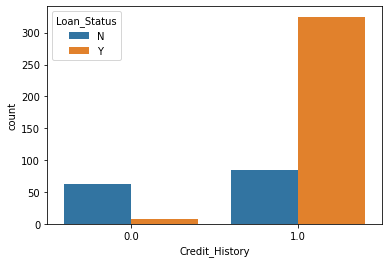

In [18]:
sns.countplot(df["Credit_History"],hue = df["Loan_Status"])

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

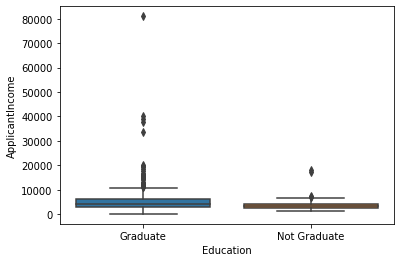

In [19]:
sns.boxplot(x = df['Education'],y = df['ApplicantIncome'])

In [20]:
df[(df["Education"] == "Graduate") & (df["ApplicantIncome"] > 60000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,4.0,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [21]:
df.drop(["Loan_ID","Dependents","Loan_Amount_Term"],axis = 1,inplace = True)

In [22]:
df.drop([409],inplace = True)

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

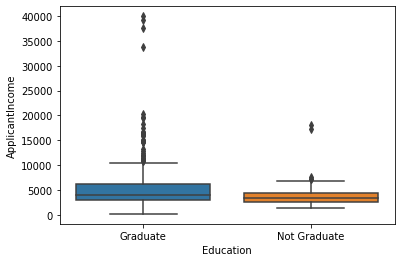

In [23]:
sns.boxplot(x = df['Education'],y = df['ApplicantIncome'])

In [24]:
df[(df["Education"] == "Graduate") & (df["ApplicantIncome"] > 25000)]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
155,Male,Yes,Graduate,No,39999,0.0,600.0,0.0,Semiurban,Y
183,Male,Yes,Graduate,No,33846,0.0,260.0,1.0,Semiurban,N
185,Male,Yes,Graduate,Yes,39147,4750.0,120.0,1.0,Semiurban,Y
443,Male,No,Graduate,No,37719,0.0,152.0,1.0,Semiurban,Y


In [25]:
df.drop([155,183,185,443],inplace = True)

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

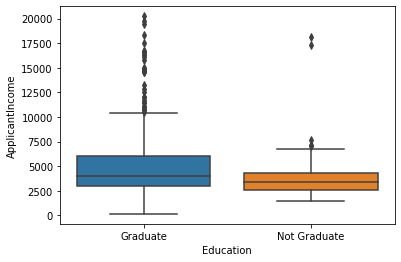

In [26]:
sns.boxplot(x = df['Education'],y = df['ApplicantIncome'])

In [27]:
df[(df["Education"] == "Not Graduate") & (df["ApplicantIncome"] > 10000)]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
493,Female,No,Not Graduate,Yes,17263,0.0,225.0,1.0,Semiurban,Y
534,Female,No,Not Graduate,Yes,18165,0.0,125.0,1.0,Urban,Y


In [28]:
df.drop([493,534],inplace = True)

# Model Building

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression


In [30]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
oe = OrdinalEncoder()
le = LabelEncoder()
x = df.drop(columns = ["Loan_Status"],axis = 1)
y = df["Loan_Status"]
catcols = x.select_dtypes(object).columns
x[catcols] = oe.fit_transform(x[catcols])

In [31]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
1,1.0,1.0,0.0,0.0,4583,1508.0,128.0,1.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.0,1.0,2.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.0,1.0,2.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.0,1.0,2.0
5,1.0,1.0,0.0,1.0,5417,4196.0,267.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900,0.0,71.0,1.0,0.0
610,1.0,1.0,0.0,0.0,4106,0.0,40.0,1.0,0.0
611,1.0,1.0,0.0,0.0,8072,240.0,253.0,1.0,2.0
612,1.0,1.0,0.0,0.0,7583,0.0,187.0,1.0,2.0


In [32]:
y_s = pd.Series(y)
y_s.value_counts()

Y    327
N    146
Name: Loan_Status, dtype: int64

In [33]:
y = le.fit_transform(y)

Gender column has skewness:-1.6872731504692078
Married column has skewness:-0.624591228516136
Education column has skewness:1.493408892347907
Self_Employed column has skewness:2.1590727279371293
ApplicantIncome column has skewness:2.10330550908368
CoapplicantIncome column has skewness:5.871574616260092
LoanAmount column has skewness:2.268618481190077
Credit_History column has skewness:-2.0307101190246426
Property_Area column has skewness:-0.040362574331414346


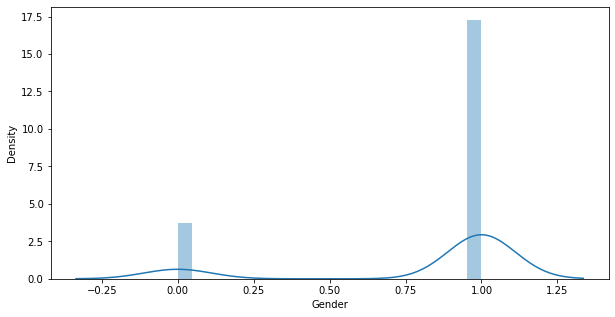

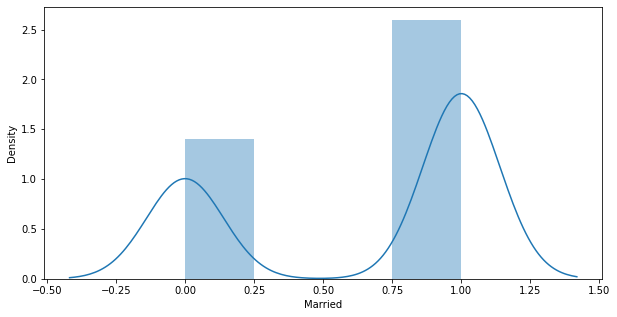

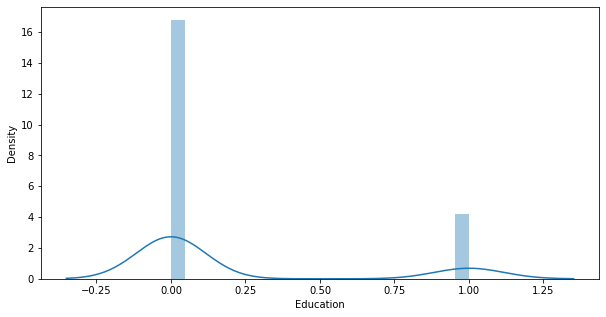

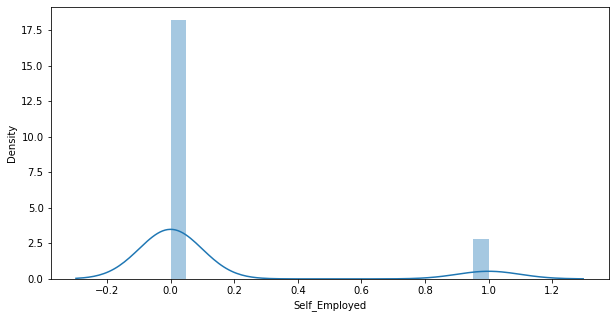

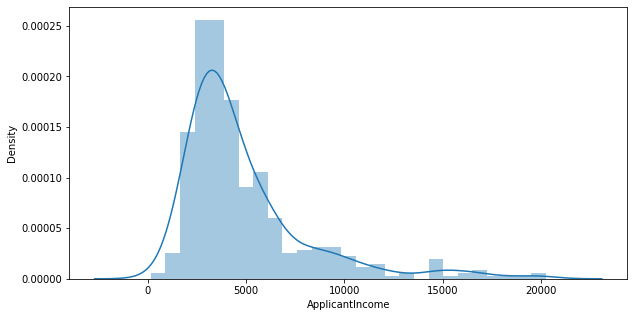

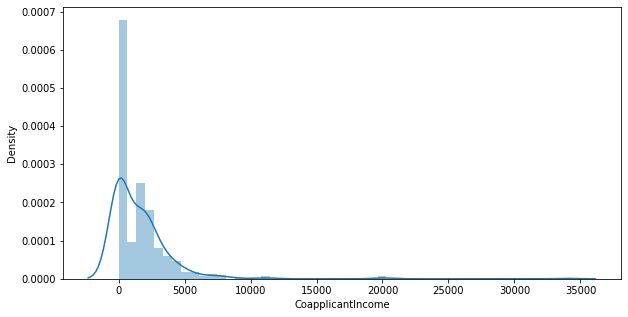

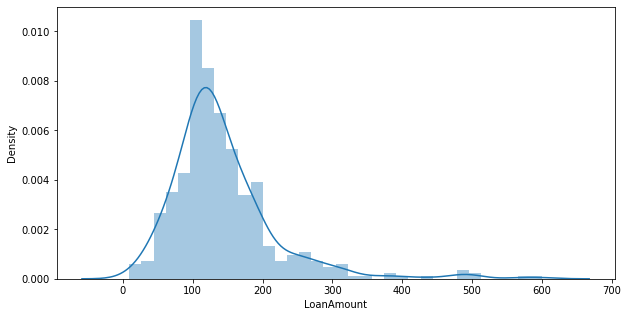

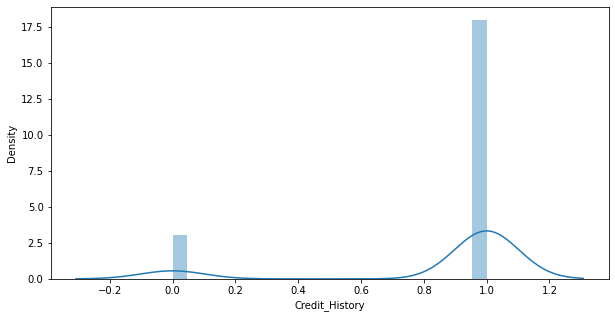

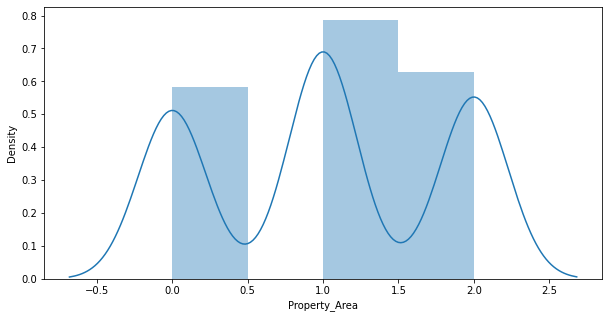

In [34]:
from scipy.stats import skew
numvalues = x.select_dtypes(['int64','float64']).columns 

for i in numvalues:
    j = skew(x[i])
    print(f'{i} column has skewness:{skew(x[i])}')
    
    plt.rcParams['figure.figsize'] = (10,5)
    plt.figure()
    sns.distplot(x[i])

In [35]:
x["ApplicantIncome"] = np.sqrt(x["ApplicantIncome"])

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=2,stratify = y)

In [37]:
def model(model):
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f"Train : {train}\n Test : {test}")
    print(classification_report(ytest,pred))
    print(confusion_matrix(ytest,pred))
    return model

# Decision Tree

In [38]:
model(DecisionTreeClassifier())

Train : 1.0
 Test : 0.7684210526315789
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        29
           1       0.85      0.80      0.83        66

    accuracy                           0.77        95
   macro avg       0.73      0.75      0.74        95
weighted avg       0.78      0.77      0.77        95

[[20  9]
 [13 53]]


DecisionTreeClassifier()

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameter = {
    "criterion":["gini","entropy"],
    "max_depth":list(range(1,20)),
    "min_samples_leaf":list(range(1,20))
}

In [41]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=parameter)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]})

In [42]:
grid.best_score_

0.7990526315789475

In [43]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [44]:
model(DecisionTreeClassifier(criterion= 'gini', max_depth= 1, min_samples_leaf= 1))

Train : 0.798941798941799
 Test : 0.8526315789473684
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        29
           1       0.82      1.00      0.90        66

    accuracy                           0.85        95
   macro avg       0.91      0.76      0.79        95
weighted avg       0.88      0.85      0.84        95

[[15 14]
 [ 0 66]]


DecisionTreeClassifier(max_depth=1)

# Logistic Regression

In [45]:
model(LogisticRegression())

Train : 0.8042328042328042
 Test : 0.8421052631578947
              precision    recall  f1-score   support

           0       0.94      0.52      0.67        29
           1       0.82      0.98      0.90        66

    accuracy                           0.84        95
   macro avg       0.88      0.75      0.78        95
weighted avg       0.86      0.84      0.83        95

[[15 14]
 [ 1 65]]


LogisticRegression()

# Support Vector Machine

In [46]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(xtrain,ytrain)
pred = svm.predict(xtest)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(ytest,pred))
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)
print(train)
print(test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.69      1.00      0.82        66

    accuracy                           0.69        95
   macro avg       0.35      0.50      0.41        95
weighted avg       0.48      0.69      0.57        95

0.6931216931216931
0.6947368421052632


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sd = StandardScaler()
x.iloc[:,4:8] = sd.fit_transform(x.iloc[:,4:8])

In [49]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
1,1.0,1.0,0.0,0.0,0.040941,-0.032944,-0.193744,0.409758,0.0
2,1.0,1.0,0.0,1.0,-0.599768,-0.607608,-0.995457,0.409758,2.0
3,1.0,1.0,1.0,0.0,-0.795517,0.290971,-0.297191,0.409758,2.0
4,1.0,0.0,0.0,0.0,0.524823,-0.607608,-0.025643,0.409758,2.0
5,1.0,1.0,0.0,1.0,0.333517,0.991391,1.603644,0.409758,2.0
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,-0.645402,-0.607608,-0.930803,0.409758,0.0
610,1.0,1.0,0.0,0.0,-0.138488,-0.607608,-1.331659,0.409758,0.0
611,1.0,1.0,0.0,0.0,1.138717,-0.516150,1.422612,0.409758,2.0
612,1.0,1.0,0.0,0.0,1.001714,-0.607608,0.569176,0.409758,2.0


In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,stratify = y,random_state=2)


In [51]:
xtrain.shape

(354, 9)

In [52]:
xtest.shape

(119, 9)

In [53]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(xtrain,ytrain)
pred = svm.predict(xtest)

print(classification_report(ytest,pred))
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)
print(train)
print(test)               # 0 means Y and 1 means N

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        37
           1       0.80      1.00      0.89        82

    accuracy                           0.83       119
   macro avg       0.90      0.73      0.76       119
weighted avg       0.86      0.83      0.81       119

0.8135593220338984
0.8319327731092437


In [54]:
print(confusion_matrix(ytest,pred))

[[17 20]
 [ 0 82]]


In [55]:
params = {
    "C":[0.1,1,10],
    "gamma" : [0.1,0.01,0.001],
    "kernel" : ['rbf']
}

In [56]:
grid = GridSearchCV(SVC(),param_grid=params)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [57]:
grid.best_score_

0.8022535211267605

In [58]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [59]:
from sklearn.svm import SVC
svm = SVC( C = 1, kernel = 'poly')
svm = svm.fit(xtrain,ytrain)
pred = svm.predict(xtest)

print(classification_report(ytest,pred))
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)
print(train)
print(test)               # 0 means Y and 1 means N

              precision    recall  f1-score   support

           0       1.00      0.49      0.65        37
           1       0.81      1.00      0.90        82

    accuracy                           0.84       119
   macro avg       0.91      0.74      0.78       119
weighted avg       0.87      0.84      0.82       119

0.8192090395480226
0.8403361344537815


In [60]:
print(confusion_matrix(ytest,pred))

[[18 19]
 [ 0 82]]
